# Human Resource Analysis

## Key points

###  1. Calculate basic statistics for numerical variables 
###  2. Calculate diversity metrics 
### 3. Compare salary distributions across different departments or genders using side-by-side histograms.
### 4. Create a pie chart to display the distribution of termination reasons.
### 5. Generate a bar chart or stacked bar chart to visualize employee performance scores.

## Calculate basic statistics for numerical variables like Salary, EngagementSurvey, EmpSatisfaction, etc

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hr_data=pd.read_csv('/Users/eltonmungai/Documents/Portfolio/datasets/HRDataset_v14.csv')
hr_data

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [3]:
numerical_stats=hr_data[['Salary','EngagementSurvey','EmpSatisfaction']].describe()
numerical_stats

,Salary,EngagementSurvey,EmpSatisfaction
count,311.000000,311.000000,311.000000
mean,69020.684887,4.110000,3.890675
std,25156.636930,0.789938,0.909241
min,45046.000000,1.120000,1.000000
25%,55501.500000,3.690000,3.000000
50%,62810.000000,4.280000,4.000000
75%,72036.000000,4.700000,5.000000
max,250000.000000,5.000000,5.000000


## Caalculate diversity metrics

In [15]:
sex_counts = hr_data['Sex'].value_counts()
race_counts = hr_data['RaceDesc'].value_counts()
hispanic_counts=hr_data['HispanicLatino'].value_counts()

print("Count of Each Sex (Gender):\n" ,sex_counts)
print("\nCount of Each Race:\n", race_counts)
print("\nCount Of Hispanic/latino:\n", hispanic_counts)

Count of Each Sex (Gender):
 F     176
M     135
Name: Sex, dtype: int64

Count of Each Race:
 White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: RaceDesc, dtype: int64

Count Of Hispanic/latino:
 No     282
Yes     27
no       1
yes      1
Name: HispanicLatino, dtype: int64


In [10]:
gender_diversity = hr_data['Sex'].value_counts(normalize=True)
race_diversity = hr_data['RaceDesc'].value_counts(normalize=True)
hispanic_diversity = hr_data['HispanicLatino'].value_counts(normalize=True)
print("Gender Diversity:")
print(gender_diversity)

print("\nRace/Ethnicity Diversity:")
print(race_diversity)

print("\nHispanic/Latino Diversity:")
print(hispanic_diversity)

Gender Diversity:
F     0.565916
M     0.434084
Name: Sex, dtype: float64

Race/Ethnicity Diversity:
White                               0.601286
Black or African American           0.257235
Asian                               0.093248
Two or more races                   0.035370
American Indian or Alaska Native    0.009646
Hispanic                            0.003215
Name: RaceDesc, dtype: float64

Hispanic/Latino Diversity:
No     0.906752
Yes    0.086817
no     0.003215
yes    0.003215
Name: HispanicLatino, dtype: float64


#  Compare salary distributions across different departments or genders using side-by-side histograms.

## Salary distribution according to gender

In [20]:
male_salary=hr_data[hr_data['Sex']=='M ']['Salary']
female_salary=hr_data[hr_data['Sex']=='F']['Salary']

print("Mean Salary for Male Employees:",male_salary.mean())
print("Mean Salary for Female Employees:",female_salary.mean())

Mean Salary for Male Employees: 70629.4
Mean Salary for Female Employees: 67786.72727272728


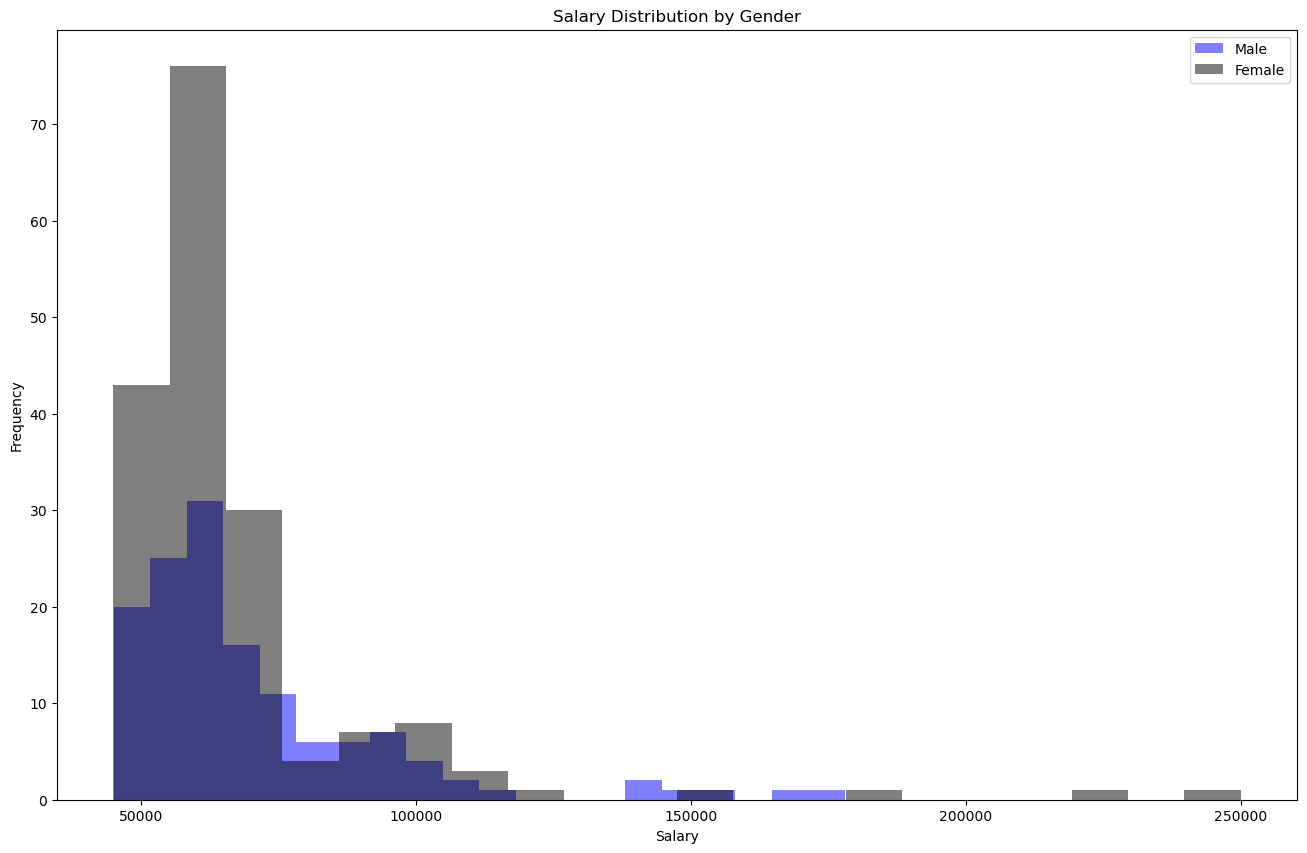

In [25]:
plt.figure(figsize=(16,10))
plt.hist(male_salary, bins=20, alpha=0.5, color='blue', label='Male')
plt.hist(female_salary, bins=20, alpha=0.5, color='black', label='Female')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution by Gender')
plt.legend()
plt.show()

## Salary according to Department 

In [26]:
departments=hr_data['Department'].unique()
print("Different Departments:")
for department in departments:
    print(department)

Different Departments:
Production       
IT/IS
Software Engineering
Admin Offices
Sales
Executive Office


In [29]:
department_counts = hr_data['Department'].value_counts()
print("Number of people per Department:\n", department_counts)

Number of people per Department:
 Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64


In [28]:
production_salary=hr_data[hr_data['Department']=='Production       ']['Salary']
it_is_salary=hr_data[hr_data['Department']=='IT/IS']['Salary']
software_salary=hr_data[hr_data['Department']=='Software Engineering']['Salary']
admin_salary=hr_data[hr_data['Department']=='Admin Offices']['Salary']
sales_salary=hr_data[hr_data['Department']=='Sales']['Salary']
executive_salary=hr_data[hr_data['Department']=='Executive Office']['Salary']

print("Mean Salary for Production Employees:",production_salary.mean())
print("Mean Salary for IT/IS Employees:",it_is_salary.mean())
print("Mean Salary for Software Engineering Employees:",software_salary.mean())
print("Mean Salary for Admin Offices Employees:",admin_salary.mean())
print("Mean Salary for Sales Employees:",sales_salary.mean())
print("Mean Salary for Production Employees:",executive_salary.mean())

Mean Salary for Production Employees: 59953.545454545456
Mean Salary for IT/IS Employees: 97064.64
Mean Salary for Software Engineering Employees: 94989.45454545454
Mean Salary for Admin Offices Employees: 71791.88888888889
Mean Salary for Sales Employees: 69061.25806451614
Mean Salary for Production Employees: 250000.0


In [33]:
department_mean_salary = salary_department_data.groupby('Department')['Salary'].mean()
print("Mean Salary by Department:\n", department_mean_salary)

Mean Salary by Department:
 Department
Admin Offices            71791.888889
Executive Office        250000.000000
IT/IS                    97064.640000
Production               59953.545455
Sales                    69061.258065
Software Engineering     94989.454545
Name: Salary, dtype: float64


In [34]:
salary_department_data= hr_data[['Department', 'Salary']]
department_salary_stats= salary_department_data.groupby('Department')['Salary'].describe()


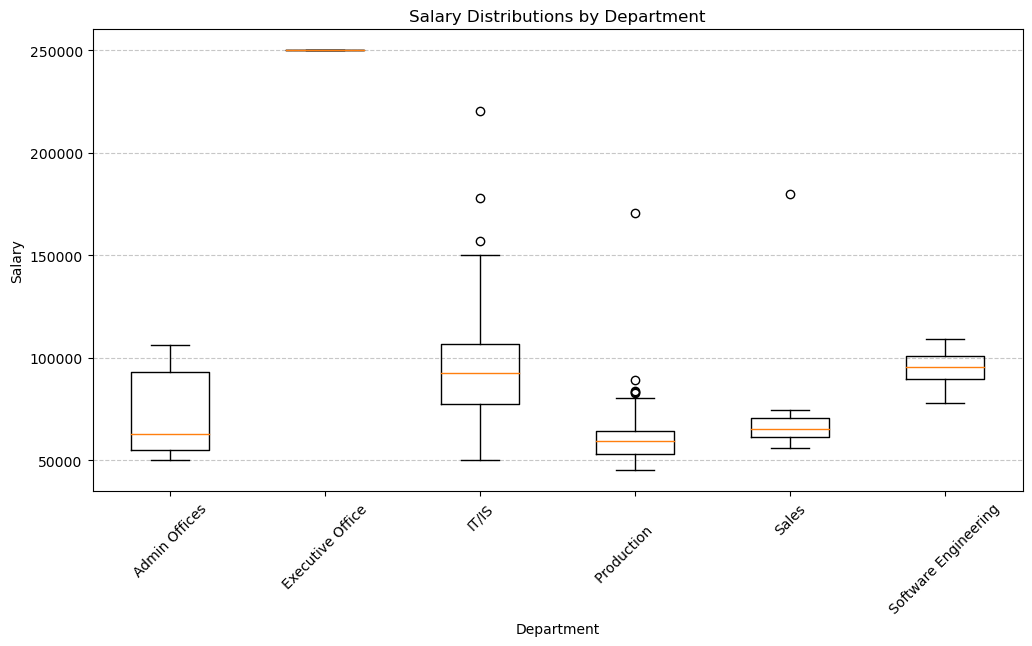

In [37]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.title('Salary Distributions by Department')
plt.xlabel('Department')
plt.ylabel('Salary')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.boxplot([salary_department_data[salary_department_data['Department'] == department]['Salary'] for department in department_salary_stats.index],
            labels=department_salary_stats.index)
plt.show()

# Create a pie chart to display the distribution of termination reasons.

In [39]:
termination_reasons=hr_data['TermReason']
termination_reasons_counts=termination_reasons.value_counts()
termination_reasons_counts

N/A-StillEmployed                   207
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
no-call, no-show                      4
military                              4
retiring                              4
performance                           4
maternity leave - did not return      3
medical issues                        3
Learned that he is a gangster         1
Fatal attraction                      1
gross misconduct                      1
Name: TermReason, dtype: int64

/var/folders/l_/c4213z2n0171r02k5wlz1tg40000gp/T/ipykernel_18103/2559865203.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  labels = ['{}: {:.1f}%'.format(reason, (count / termination_reasons_counts.sum()) * 100) for reason, count in termination_reasons_counts.iteritems()]


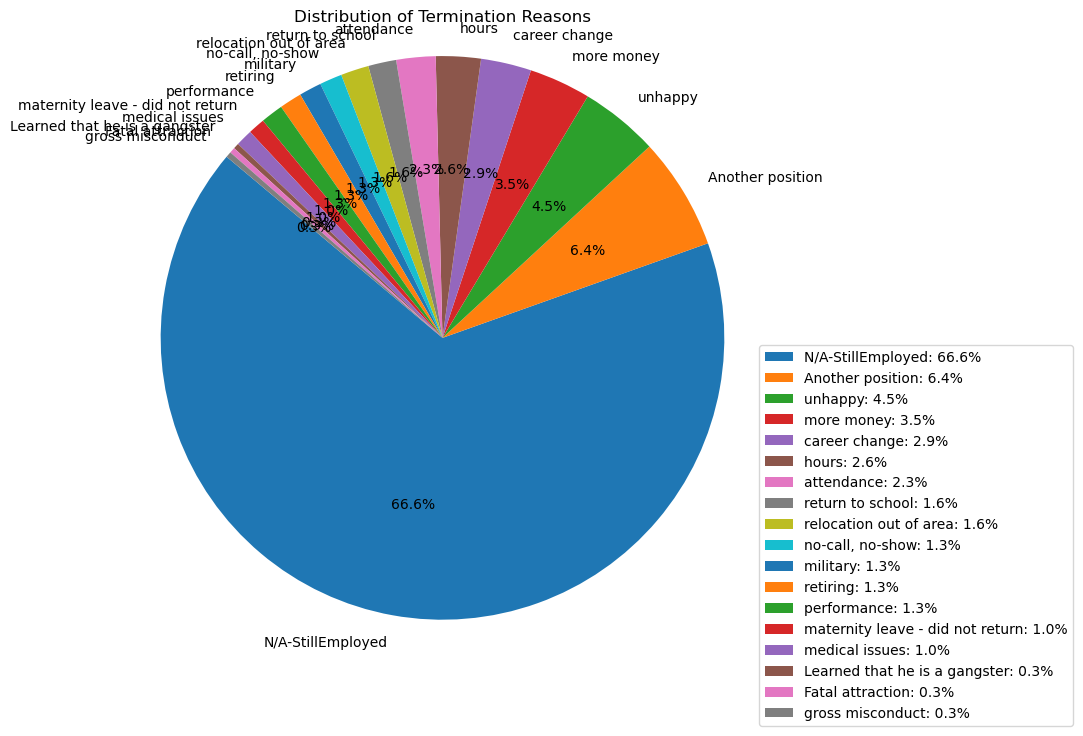

In [44]:
plt.figure(figsize=(8, 8))
plt.pie(termination_reasons_counts, labels=termination_reasons_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Termination Reasons')
plt.axis('equal')
labels = ['{}: {:.1f}%'.format(reason, (count / termination_reasons_counts.sum()) * 100) for reason, count in termination_reasons_counts.iteritems()]
plt.legend(labels, loc='best', bbox_to_anchor=(1, 0.5))
plt.show()


# Generate a bar chart or stacked bar chart to visualize employee performance scores.

## Performance in whole company

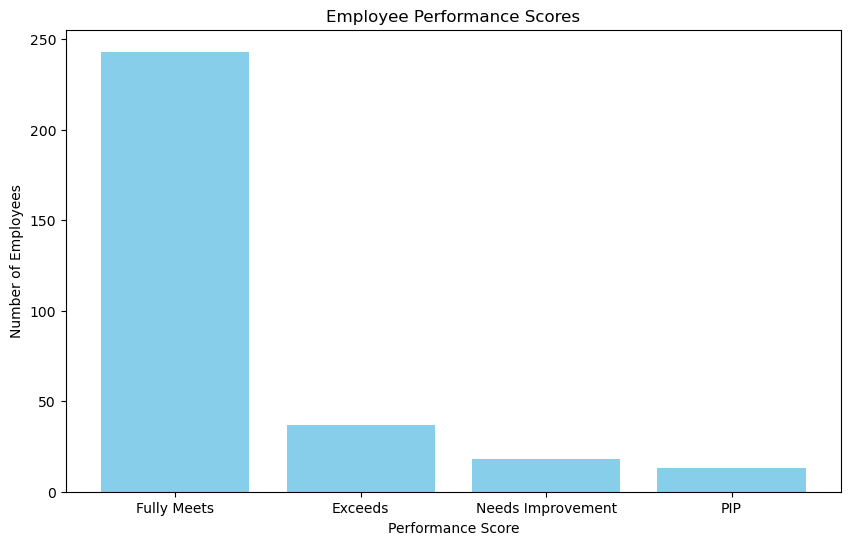

In [45]:
performance_data = hr_data[['PerformanceScore', 'EmpID']]
performance_counts = performance_data['PerformanceScore'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(performance_counts.index, performance_counts.values, color='skyblue')
plt.title('Employee Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Number of Employees')

# Display the bar chart
plt.show()

## Perfomance score by Department

<Figure size 1000x600 with 0 Axes>

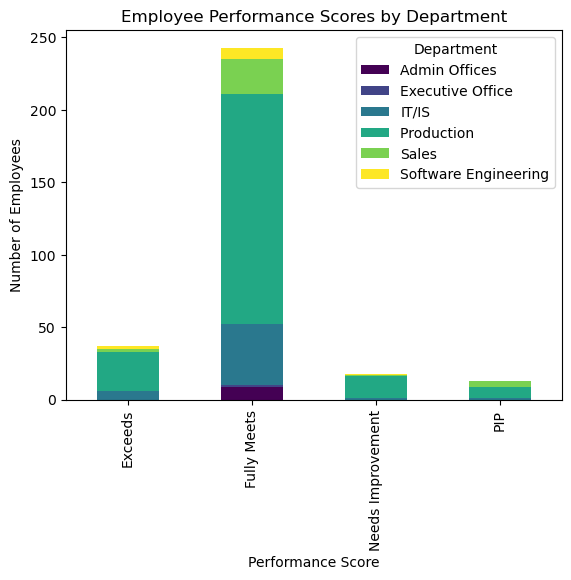

In [46]:
performance_department_data = hr_data[['PerformanceScore', 'Department', 'EmpID']]

performance_department_counts = performance_department_data.groupby(['PerformanceScore', 'Department']).size().unstack()

plt.figure(figsize=(10, 6))
performance_department_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Employee Performance Scores by Department')
plt.xlabel('Performance Score')
plt.ylabel('Number of Employees')
plt.legend(title='Department', loc='upper right')

plt.show()